In [148]:
import pandas as pd
data = pd.read_csv("wines.csv")
display(data.head())
# data = data.apply(lambda x: x/x.max(), axis=0)

,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Take 80% of data as training set and 20% will be tests

In [149]:
train = data.sample(frac = 0.9)
test = data.drop(train.index)

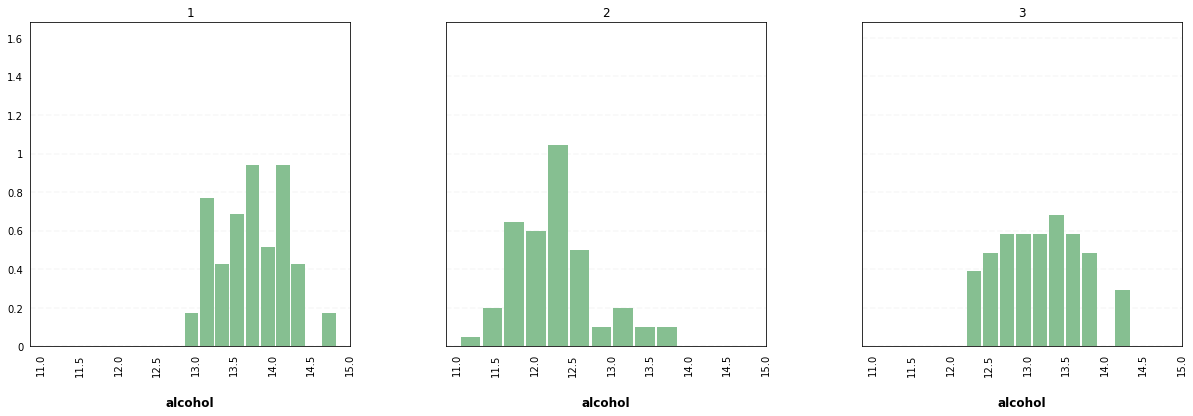

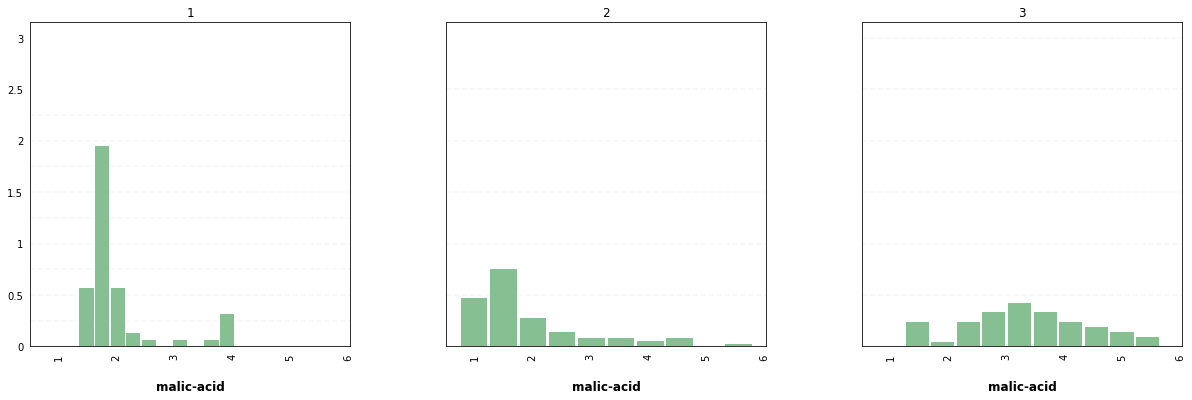

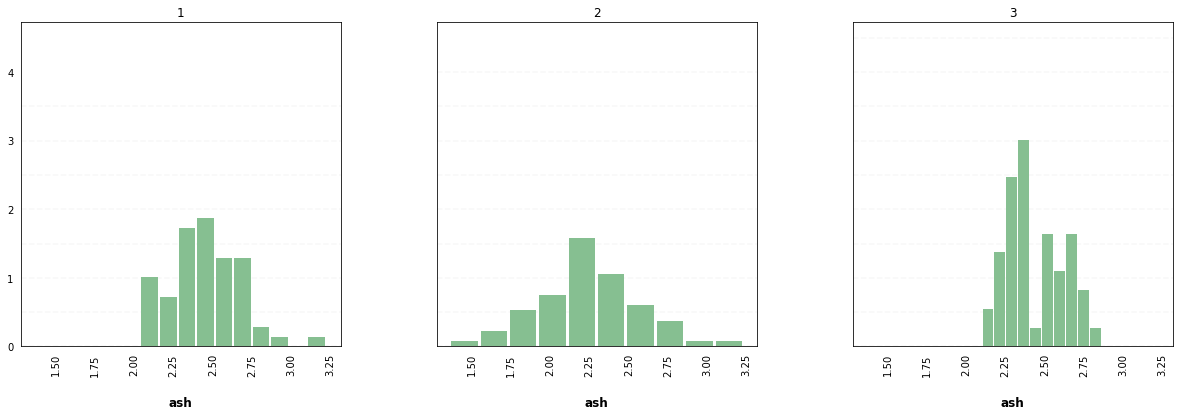

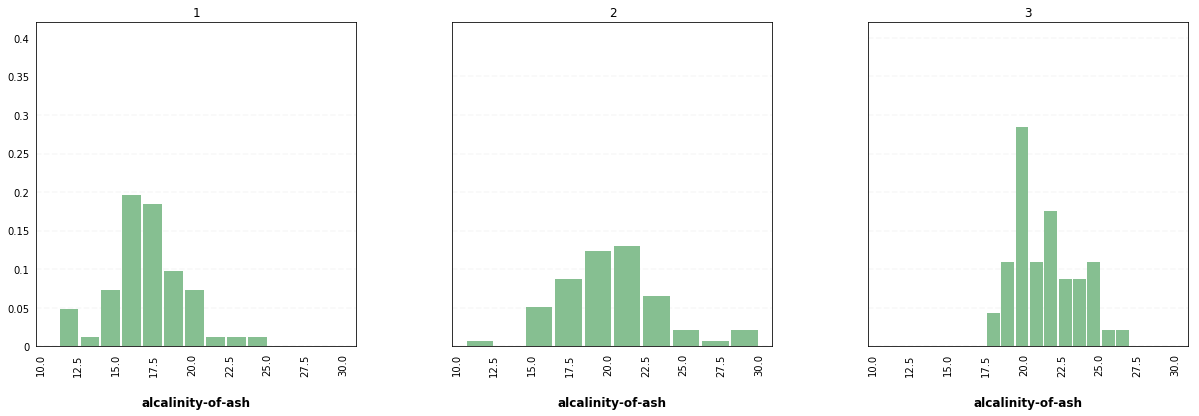

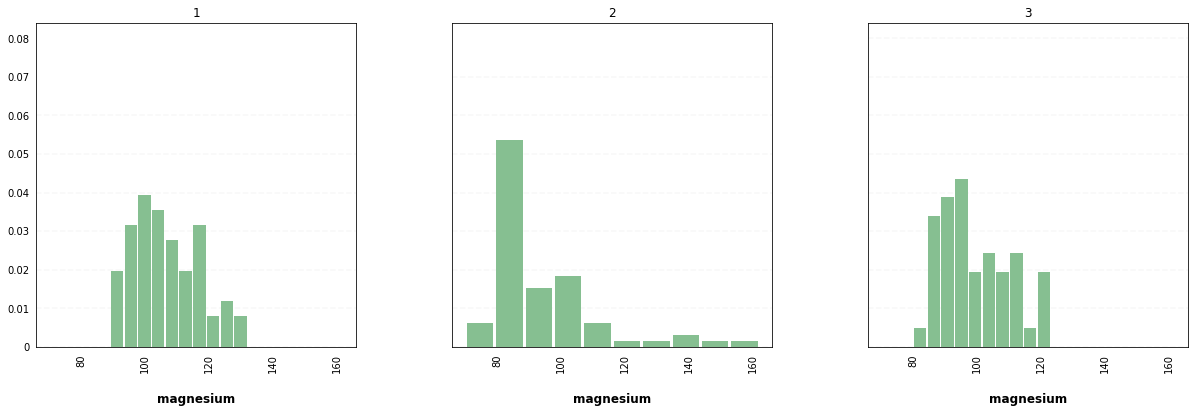

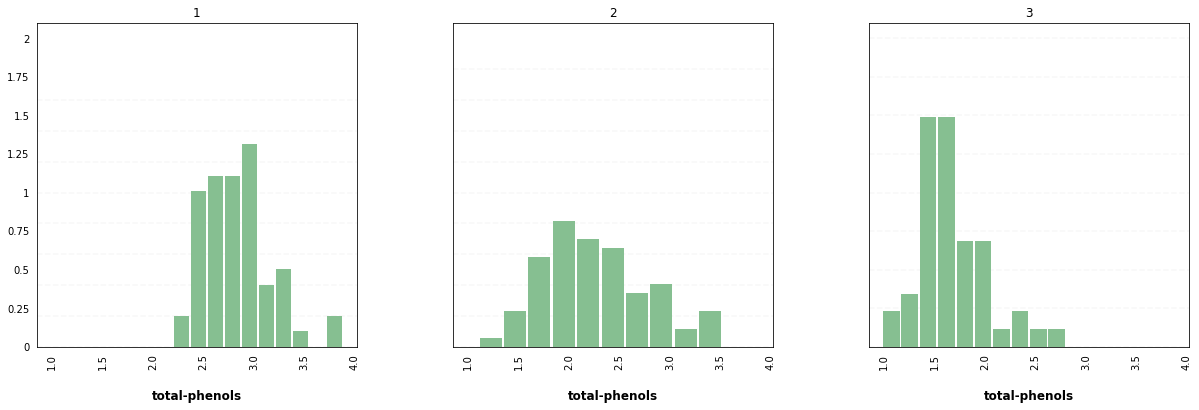

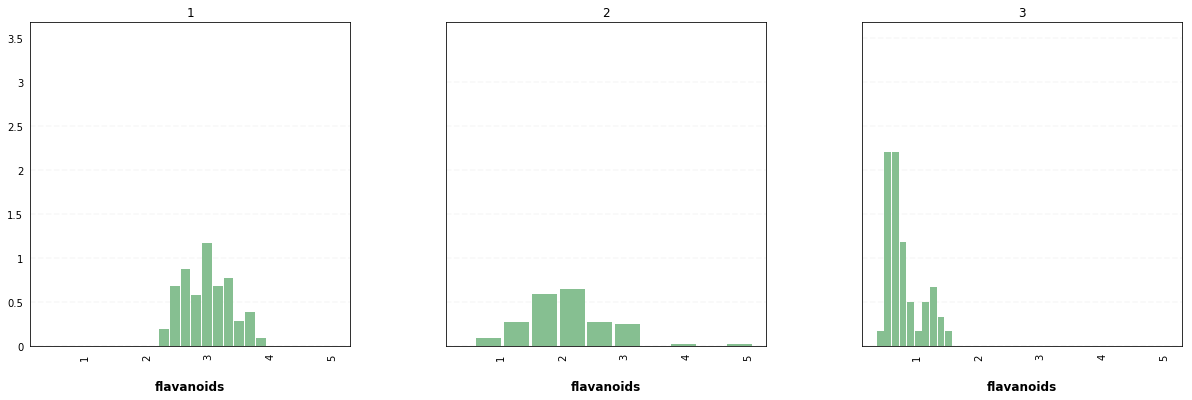

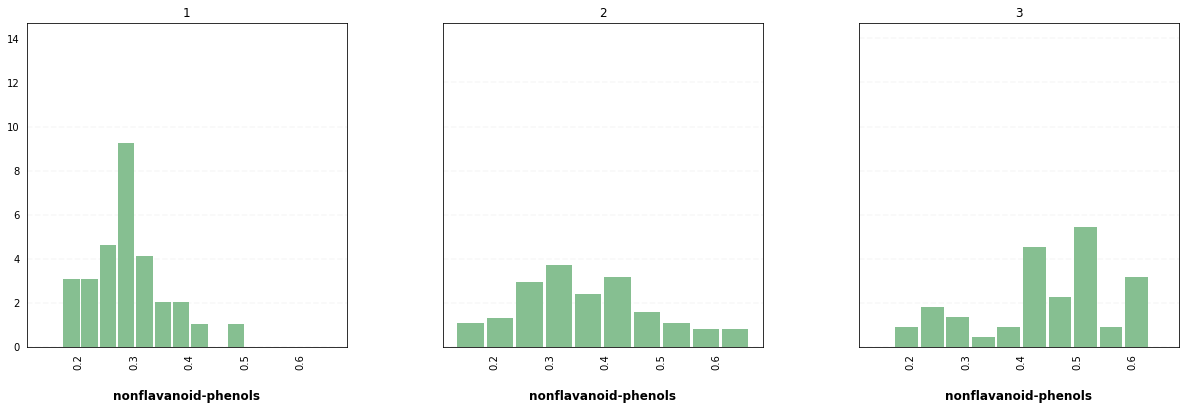

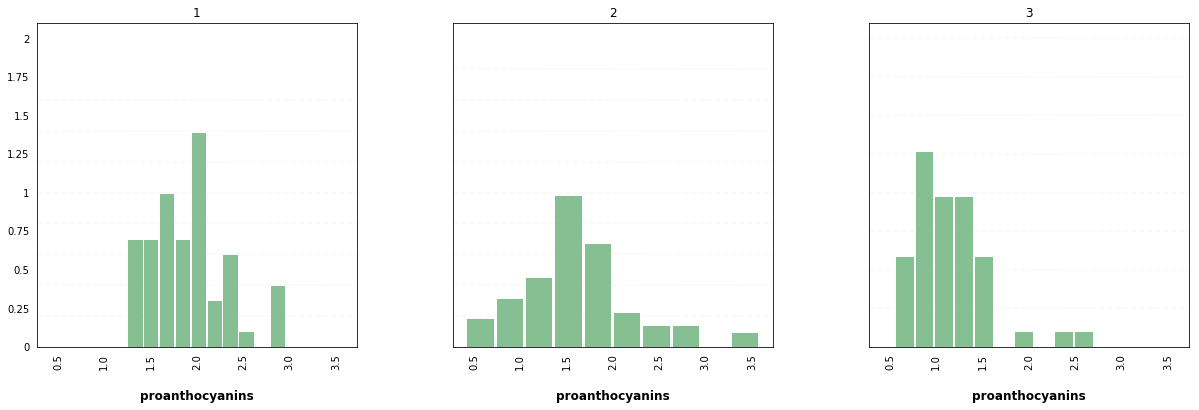

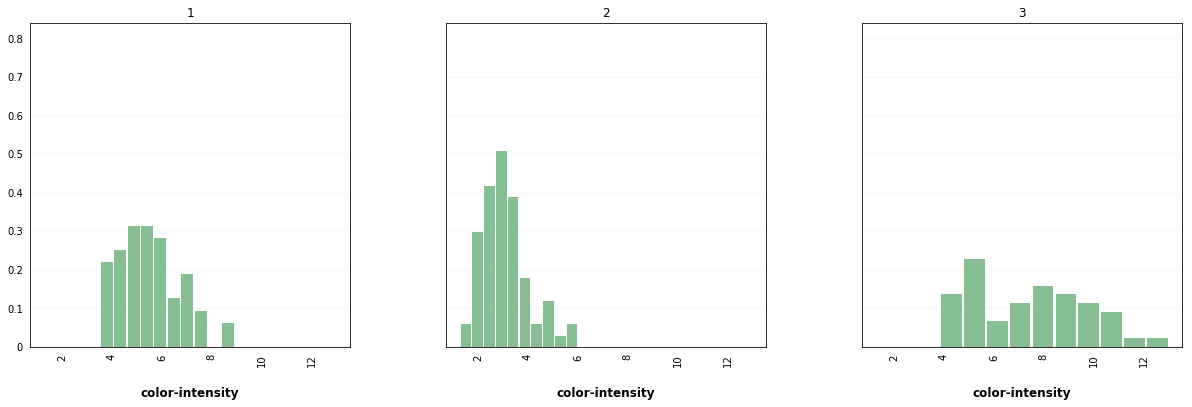

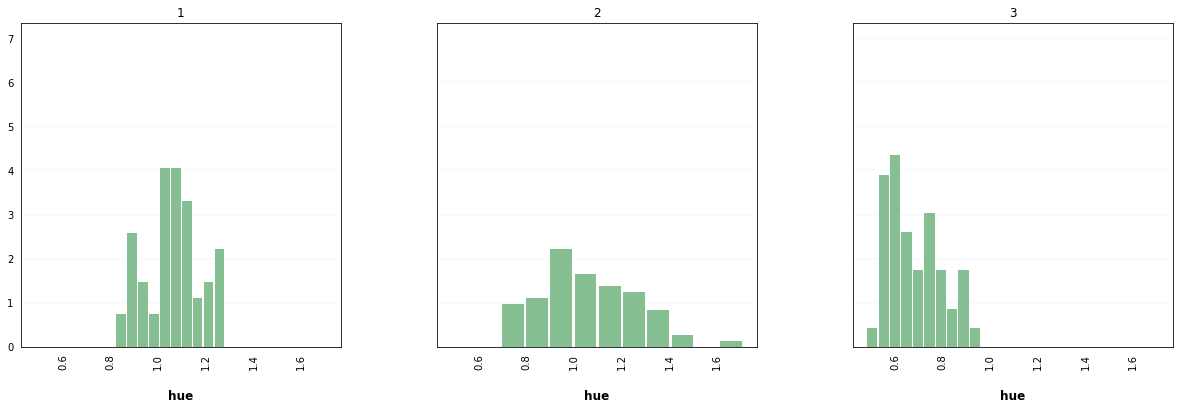

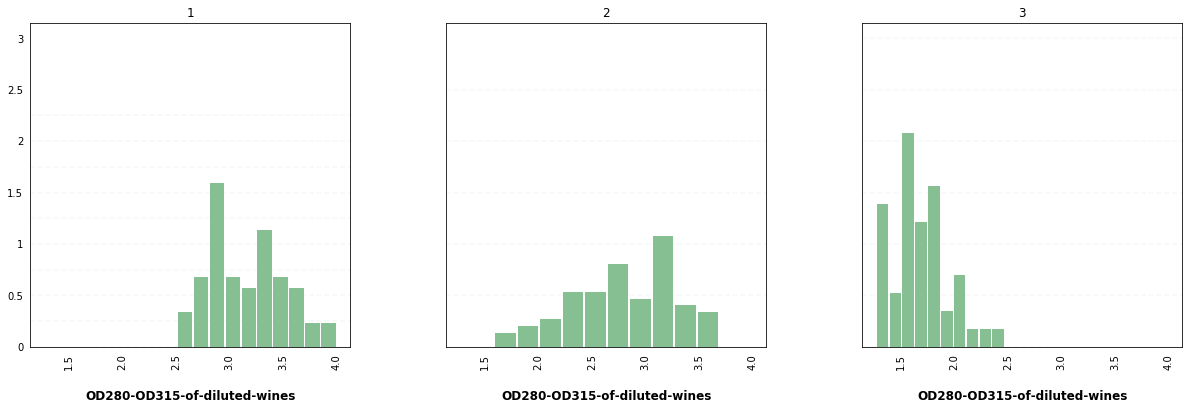

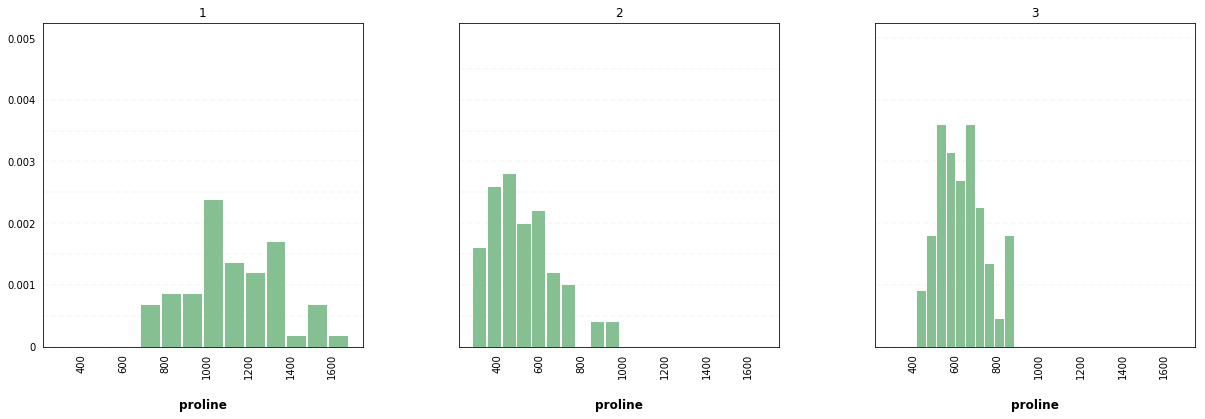

In [150]:
from matplotlib.ticker import StrMethodFormatter  
def plot_hist_for_each_class(data, att):
    ax = data.hist(column=att, by='class', grid=False, figsize=(20,6), layout=(1,3), density=1,sharex=True,sharey=True, color='#86bf91', zorder=2, rwidth=0.9)
    for i,x in enumerate(ax):
        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        # Set x-axis label
        x.set_xlabel(att, labelpad=20, weight='bold', size=12)
        # Set y-axis label
        if i == 1:
            x.set_ylabel("Occurances", labelpad=50, weight='bold', size=12)
        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
        x.tick_params(axis='x')
    return ax
    
attributes = list(train.columns.values); attributes.remove('class')
for att in attributes:
    plot_hist_for_each_class(data, att)

Calculate p<sub>c<sub>i</sub></sub>(x), where c<sub>i</sub> - class - probability density function created from training examples which belong to class c<sub>i</sub>

In [151]:
from math import exp, sqrt, pi
def p_ci(x, data, attribute_name, ci, variance):
    total_p = 0
    ci_examples = data.loc[data['class'] == ci]
    ci_examples_att_list = ci_examples[attribute_name]
    m = len(ci_examples_att_list)
    for mu in ci_examples_att_list:
        total_p += exp(-(x - mu) ** 2 / (2 * variance))
    k = 1 / (sqrt(2 * pi * variance) ** m)
    return k * total_p

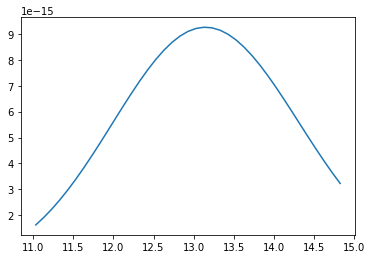

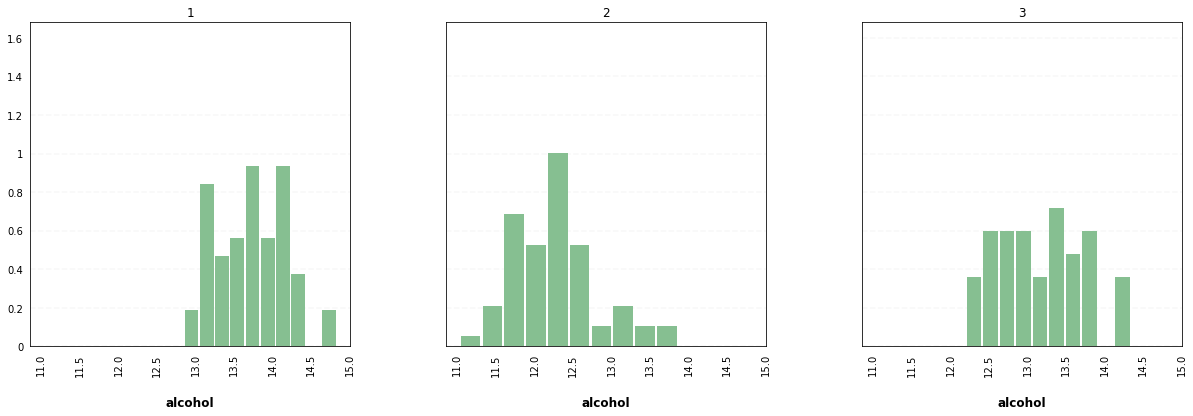

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

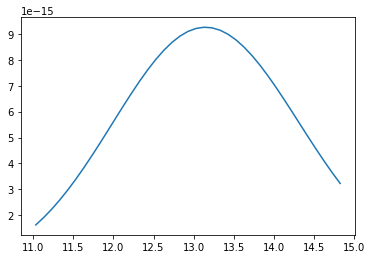

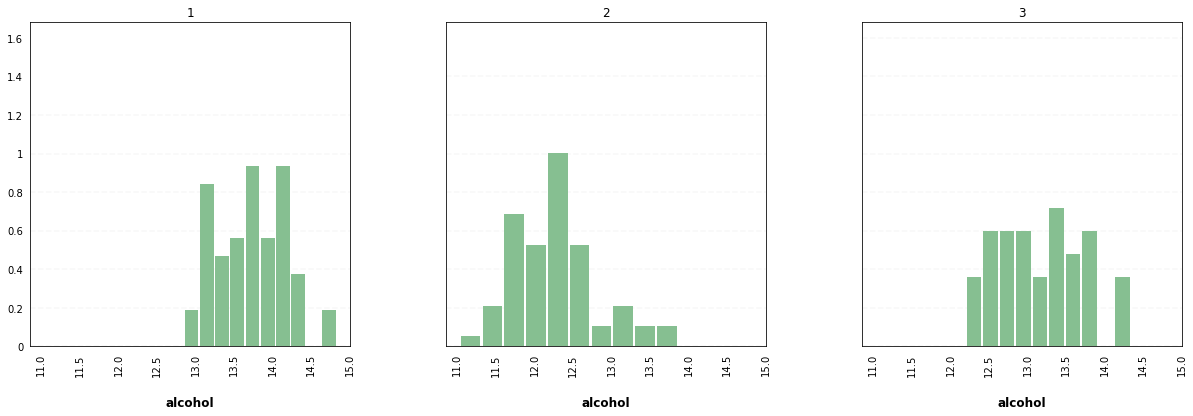

In [152]:
import matplotlib.pyplot as plt
import numpy as np
x_vals = np.arange(train['alcohol'].min(), train['alcohol'].max(), 0.1)
y_vals = []
for x_val in x_vals:
    y_vals.append(p_ci(x_val, train, 'alcohol', 3, 1))
plt.plot(x_vals, y_vals)
plt.show(plot_hist_for_each_class(train, 'alcohol'))


P(c<sub>i</sub>) - relative frequency of c<sub>i</sub> in the training set

In [153]:
def P(ci, data):
    return len(data.loc[data['class']==ci])/len(data)

 $p_{c_i}(\mathbf{x}) =  \prod_{i=1}^n p_{c_i}(x)$ - probability density function for $\mathbf{x}$ described by the set of parameters:

In [154]:
def p_ci_vec(vector, ci, data, variance):
    pp = 1
    for k, v in vector.items():
        pp *= p_ci(float(v), data, k, ci, variance)
    return pp

Find the name of the most probable class for the object described by vector $\mathbf{x}$:

In [155]:
def most_probable_class(vector, data, variance=1):
    possible_classes = set(data['class'])
    most_prob_class = [0, '']
    for cj in possible_classes:
        prob_cj = p_ci_vec(vector, cj, data, variance) * P(cj, data)
        if prob_cj > most_prob_class[0]:
            most_prob_class = [prob_cj, cj]
    return most_prob_class

Check on the test dataset:

In [156]:
x = test[attributes]
success = 0
fail = 0
for i in range(len(test)):
    v = x.iloc[i]
    class_v = test.iloc[i]['class'] 
    result = most_probable_class(v, train, 0.5)[1]
    if result == int(class_v):
        success += 1
    else:
        fail += 1
print("Successes: ","{0:.2f}".format(100*success/len(test)) ,"%")
print("Fails: ", "{0:.2f}".format(100*fail/len(test)) ,"%")


Successes:  72.22 %
Fails:  27.78 %
